In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import splitfolders

In [ ]:
# ------------------ CONFIG ------------------
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 5
NUM_CLASSES = 38  # Total number of plant disease classes
DATA_DIR = r"C:\summer project\PlantVillage"  # Dataset with only train and val folders


In [6]:
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
val_aug = ImageDataGenerator(rescale=1./255)

train_gen = train_aug.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_gen = val_aug.flow_from_directory(
    os.path.join(DATA_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 43444 images belonging to 38 classes.
Found 10861 images belonging to 38 classes.


In [7]:
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history1 = model.fit(train_gen, epochs=EPOCHS_PHASE1, validation_data=val_gen)

Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 809s 595ms/step - accuracy: 0.1852 - loss: 3.1724 - val_accuracy: 0.2754 - val_loss: 2.7303
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 890s 655ms/step - accuracy: 0.2217 - loss: 2.9372 - val_accuracy: 0.2902 - val_loss: 2.6162
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 901s 663ms/step - accuracy: 0.2333 - loss: 2.8701 - val_accuracy: 0.3020 - val_loss: 2.5492
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 889s 654ms/step - accuracy: 0.2394 - loss: 2.8166 - val_accuracy: 0.3235 - val_loss: 2.4834
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 900s 662ms/step - accuracy: 0.2422 - loss: 2.7962 - val_accuracy: 0.3152 - val_loss: 2.4737
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 893s 657ms/step - accuracy: 0.2524 - loss: 2.7602 - val_accuracy: 0.3182 - val_loss: 2.4457
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 898s 660ms/step - accuracy: 0.2537 - loss: 2.7545 - val_accuracy: 0.3352 - val_loss: 2.4109
Epoch 8/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 877s 645ms/step - ac

In [14]:
model.save("plant_disease_phase1.h5")


In [3]:
# Load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model("plant_disease_phase1.h5")

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# ------------------ CONFIG ------------------
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
DATA_DIR = r"C:\summer project\PlantVillage"

# ------------------ DATA AUGMENTATION ------------------
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
val_aug = ImageDataGenerator(rescale=1./255)

# ------------------ DATA GENERATORS ------------------
train_gen = train_aug.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_gen = val_aug.flow_from_directory(
    os.path.join(DATA_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 43444 images belonging to 38 classes.
Found 10861 images belonging to 38 classes.


In [4]:
from tensorflow.keras.optimizers import Adam

# Recompile the model with a NEW optimizer instance
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history2 = model.fit(train_gen, epochs=5, validation_data=val_gen)



Epoch 1/5


c:\Users\RamaKrishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3303s 2s/step - accuracy: 0.2680 - loss: 3.4834 - val_accuracy: 0.5845 - val_loss: 1.4046
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3280s 2s/step - accuracy: 0.5415 - loss: 1.5866 - val_accuracy: 0.7360 - val_loss: 0.8537
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3279s 2s/step - accuracy: 0.6828 - loss: 1.0512 - val_accuracy: 0.8343 - val_loss: 0.5182
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3280s 2s/step - accuracy: 0.7798 - loss: 0.7133 - val_accuracy: 0.8945 - val_loss: 0.3264
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3281s 2s/step - accuracy: 0.8496 - loss: 0.4773 - val_accuracy: 0.9247 - val_loss: 0.2302


TypeError: cannot pickle 'module' object

In [7]:
model.save("plant_disease_finetuned.keras", save_format="keras")


In [9]:
model.save_weights("plant_disease.weights.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
✅ Predicted: Corn_(maize)___Northern_Leaf_Blight (96.67%)


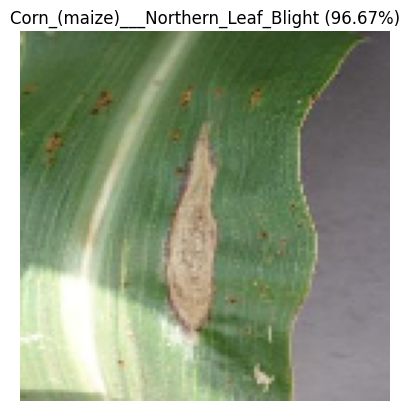

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = load_model("plant_disease_finetuned.keras")

# Load image
img_path = r"C:\summer project\PlantVillage\train\Corn_(maize)___Northern_Leaf_Blight\00a55069-3fa3-405b-8d87-4d3408a6ed98___RS_NLB 3645.JPG"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
class_names = list(train_gen.class_indices.keys())  # same order as training
predicted_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100
if confidence < 45:
    print("⚠️ Unable to confidently classify this image. Please upload a clear plant leaf.")
else:
    print(f"✅ Predicted: {predicted_class} ({confidence:.2f}%)")

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_class} ({confidence:.2f}%)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
✅ Predicted: Strawberry___Leaf_scorch (68.89%)


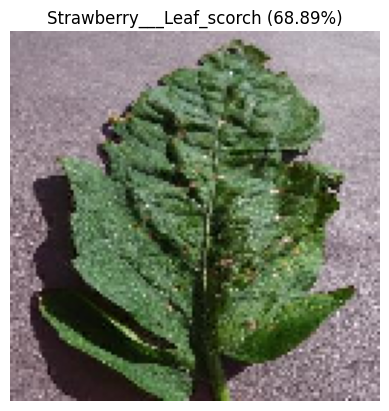

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = load_model("plant_disease_finetuned.keras")

# Load image
img_path = 
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
class_names = list(train_gen.class_indices.keys())  # same order as training
predicted_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100
if confidence < 45:
    print("⚠️ Unable to confidently classify this image. Please upload a clear plant leaf.")
else:
    print(f"✅ Predicted: {predicted_class} ({confidence:.2f}%)")

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_class} ({confidence:.2f}%)")
plt.show()


In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

confidence = ctrl.Antecedent(np.arange(0, 101, 1), 'confidence')
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
severity = ctrl.Consequent(np.arange(0, 101, 1), 'severity')

# Membership functions
confidence['low'] = fuzz.trimf(confidence.universe, [0, 0, 50])
confidence['medium'] = fuzz.trimf(confidence.universe, [30, 50, 70])
confidence['high'] = fuzz.trimf(confidence.universe, [60, 100, 100])

temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['moderate'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 50, 50])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

severity['low'] = fuzz.trimf(severity.universe, [0, 0, 50])
severity['medium'] = fuzz.trimf(severity.universe, [30, 50, 70])
severity['high'] = fuzz.trimf(severity.universe, [60, 100, 100])


In [7]:
rule1 = ctrl.Rule(confidence['high'] & humidity['high'], severity['high'])
rule2 = ctrl.Rule(confidence['medium'] & temperature['moderate'], severity['medium'])
rule3 = ctrl.Rule(confidence['low'], severity['low'])

severity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
severity_system = ctrl.ControlSystemSimulation(severity_ctrl)


✅ Loaded trained weights successfully!
Found 10861 images belonging to 38 classes.
Generating predictions...


c:\Users\RamaKrishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


340/340 ━━━━━━━━━━━━━━━━━━━━ 144s 415ms/step


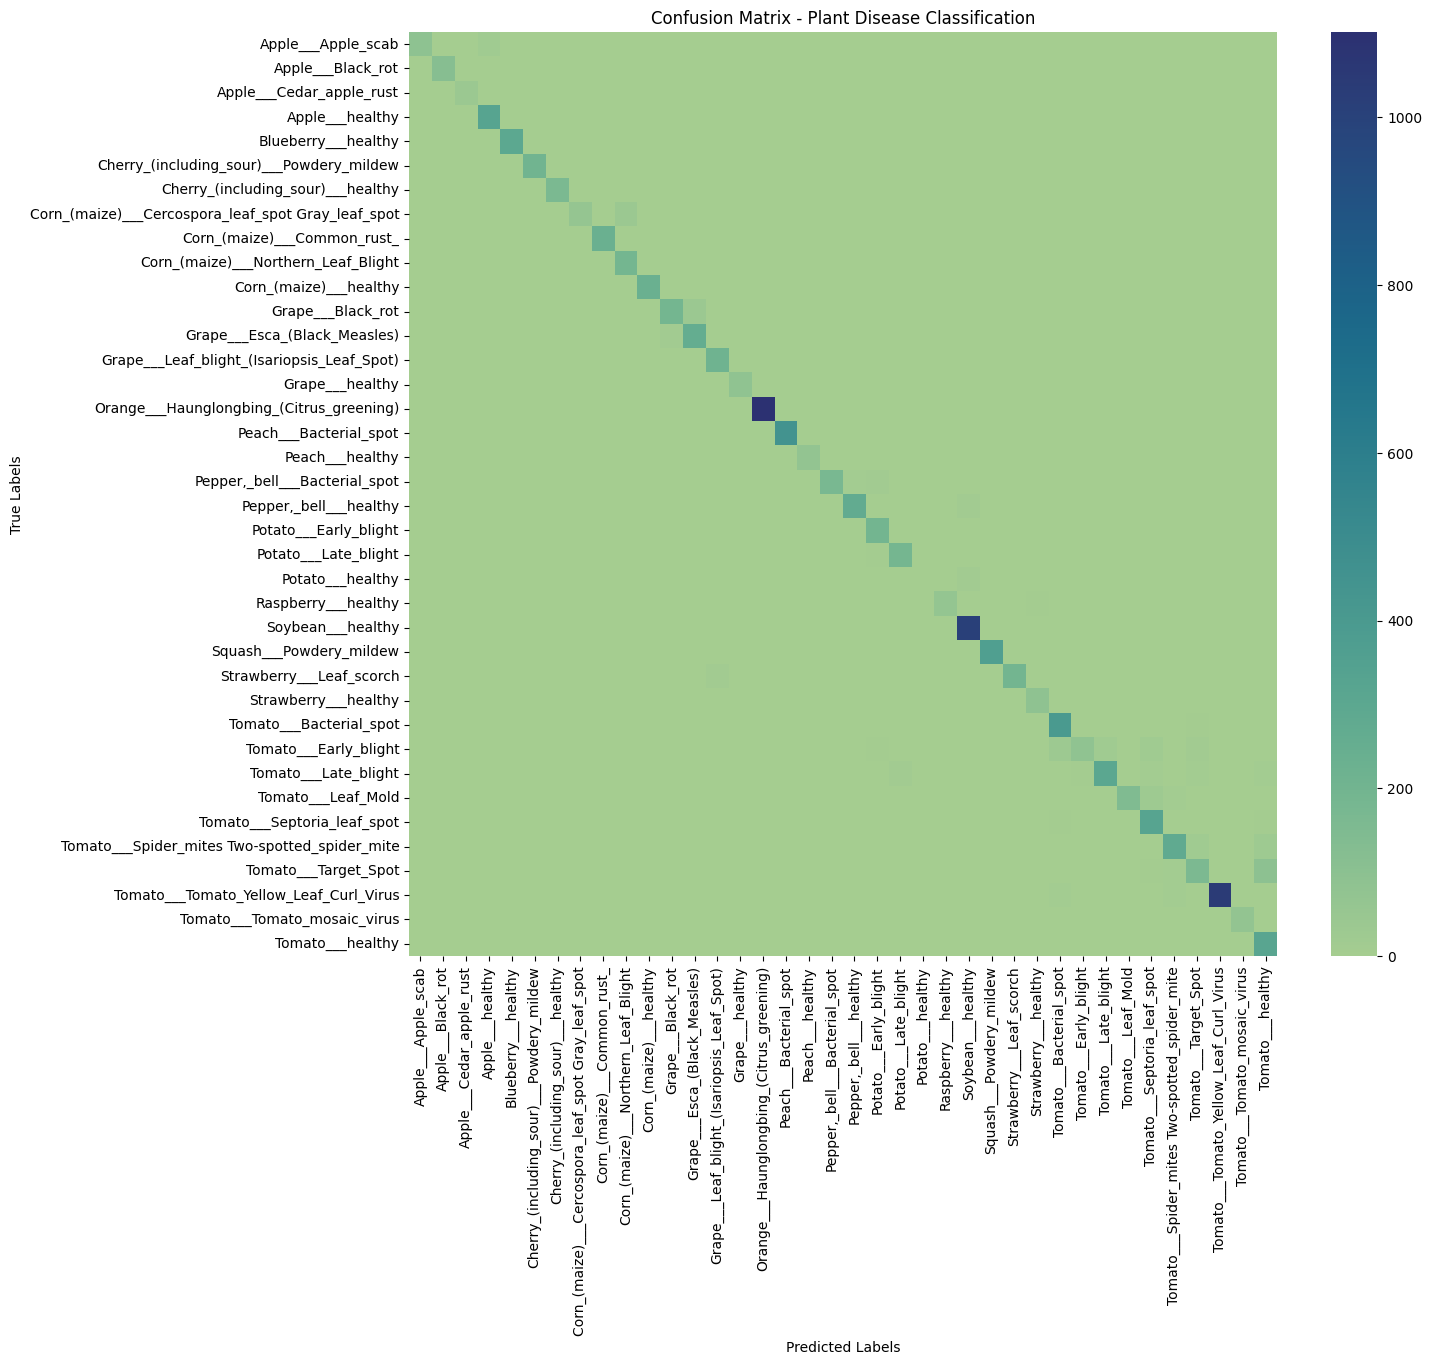


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.72      0.81       126
                                 Apple___Black_rot       0.90      0.95      0.93       125
                          Apple___Cedar_apple_rust       0.93      0.78      0.85        55
                                   Apple___healthy       0.90      0.98      0.94       329
                               Blueberry___healthy       0.98      1.00      0.99       300
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       210
                 Cherry_(including_sour)___healthy       0.95      0.98      0.97       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.61      0.76       103
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       239
               Corn_(maize)___Northern_Leaf_Blight     

C:\Users\RamaKrishna\AppData\Local\Temp\ipykernel_13116\2438383316.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_acc, palette="viridis")


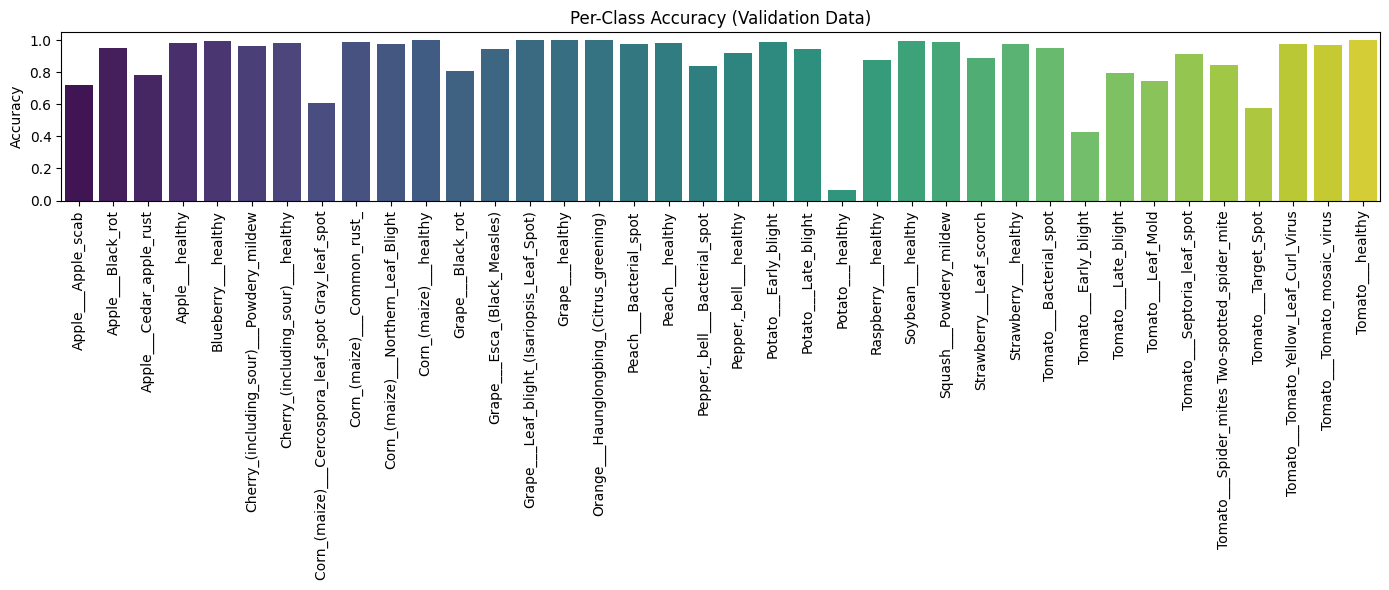

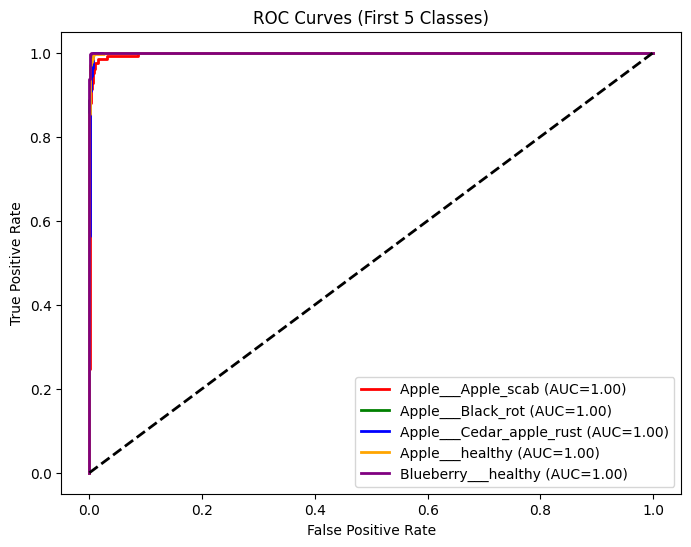

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
import os

# -------------------------------
# CONFIG
# -------------------------------
WEIGHTS_PATH = r"C:\summer project\plant_disease.weights.h5"
VAL_DIR = r"C:\summer project\PlantVillage\val"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 38  # update if needed

# -------------------------------
# REBUILD MODEL STRUCTURE
# -------------------------------
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Load trained weights
model.load_weights(WEIGHTS_PATH)
print("✅ Loaded trained weights successfully!")

# -------------------------------
# VALIDATION DATA
# -------------------------------
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# -------------------------------
# PREDICTIONS
# -------------------------------
print("Generating predictions...")
y_pred_probs = model.predict(val_gen, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# -------------------------------
# CONFUSION MATRIX
# -------------------------------
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, cmap="crest", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Plant Disease Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# -------------------------------
# CLASSIFICATION REPORT
# -------------------------------
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# -------------------------------
# PER-CLASS ACCURACY
# -------------------------------
class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(14, 6))
sns.barplot(x=class_labels, y=class_acc, palette="viridis")
plt.xticks(rotation=90)
plt.title("Per-Class Accuracy (Validation Data)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# -------------------------------
# ROC CURVES (First 5 classes)
# -------------------------------
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_labels)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
colors = cycle(['red', 'green', 'blue', 'orange', 'purple'])
for i, color in zip(range(min(5, len(class_labels))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curves (First 5 Classes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
